# Introduction to this  ML Project

## To increase music sales, we are predicting which genre to promote based on age and gender.

### Note that for the below sample dataset, 1=male & 0=female

### Step 1: Import data into notebook

In [4]:
import pandas as pd
music_data= pd.read_csv('music.csv')
music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


### Step 2: Split data into two: Input & output


In [6]:
X= music_data.drop(columns=['genre'])
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [7]:
y= music_data['genre']
y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

### Step 3: Test for prediction

In [12]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X.values,y.values)
predictions =model.predict([[22,1],[23,0]])
# To predict & recommend genres for 22 year old males and 23 year old females
predictions

array(['HipHop', 'Dance'], dtype=object)

### Step 4: Test accuracy

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X= music_data.drop(columns=['genre'])
y= music_data['genre']
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

# allocating 20% of the data for testing

model.fit(X_train,y_train)
predictions =model.predict(X_test)

score=accuracy_score(y_test,predictions)
score

1.0

#### If we run the above one more time we're going to see a different result because every time we split our dataset into training and test sets, we'll have different data sets because this function randomly picks data for training and testing. 

###  Step : Persisting models

In [20]:
import joblib
joblib.dump(model,'music recommender')
# The prediction model is now saved locally in a \.joblib\ file to recall whenever 
# I need to use it instead of rewritting it all again.

['music recommender']

#### Now I'll comment out the above prediction model and call/load the "music recommender.joblib" file to perform it

In [24]:
# X= music_data.drop(columns=['genre'])
# y= music_data['genre']
# X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)


# model.fit(X_train,y_train)
# predictions =model.predict(X_test)

model=joblib.load('music recommender')
predictions=model.predict([[23,0]])
predictions

C:\Users\zackz\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Dance'], dtype=object)

In [32]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
model=DecisionTreeClassifier()

model.fit(X.values, y.values)
export_graphviz(model, out_file='music_recommender.dot', 
                feature_names=['age', 'gender'],
                
                class_names=sorted(y.unique()),  
#                 for the unique list of genres
                label='all',
#                every node ha labels that we can read
                rounded=True,
#                 rounded corners

                filled=True)
#                 each box or node is filled with a colour


### Finally by converting the 'music_recommender.dot' file to an image, we can present the following classification model

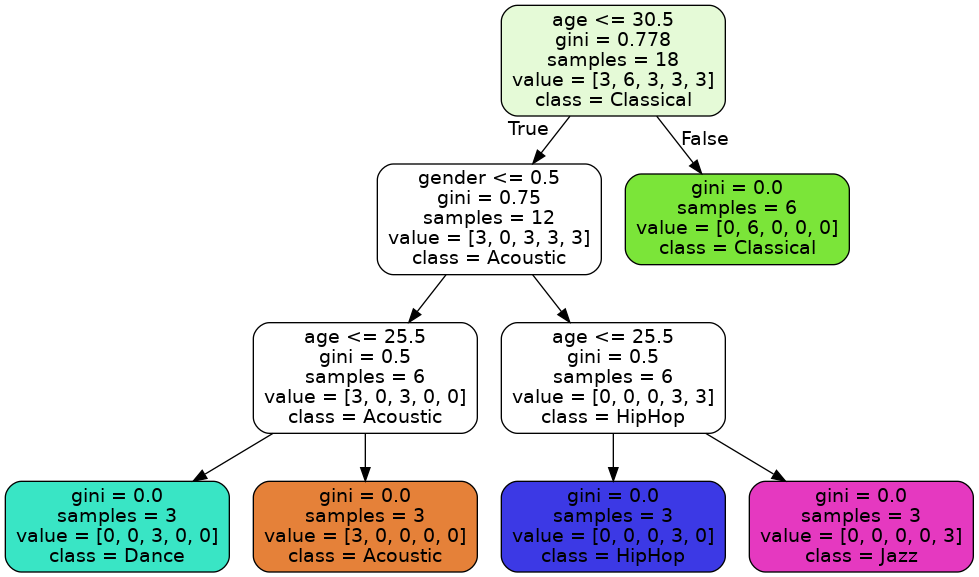